# Planning

### Project Overview

The goal of this project is to build a Linear Regression model to predict medical aid charges for clients, based on lifestyle and demographic features such as age, sex, BMI, smoking habits, number of children, and geographical region.

The dataset we’ll use is based on medical charges in the United States, but we are using it as a proof-of-concept for a South African medical aid provider. The model will help assess whether dynamic pricing based on client characteristics can be feasibly implemented.

### What Is Linear Regression?

According to Geeksforgeeks.org (2025), Linear regression is a supervised machine learning algorithm which uses labelled datasets to learn and create the best-fitting linear function for mapping data points. This function can then be used to make predictions on new data. The algorithm identifies the linear relationship between a dependent variable and one or more independent variables by fitting a linear equation to the observed data. Its primary goal is to predict continuous output values based on the input features. The image below depicts the equation of linear regression. It shows the dependent variable, intercept, coefficeint and independent variable. Note that this equation only shows 1 independent variable with its coefficient as it is meant for a simple linear regression model. The dataset that we are working with is a multiple linear regression model as it contains more than 1 independent variable.

![alt text](1_PDbfu8RCLs8RisqKHyNiJA.png)

This image was taken from (Meesala, 2023)


This image shows the difference in the equations between simple, multiple and polynomial models.


![alt text](0_z34vg1BomgkHpGUF.png)


This image was taken from (Tavishi, 2023)

### Dataset Justification

The dataset used in this project, sourced from Kaggle (https://www.kaggle.com/datasets/mirichoi0218/insurance), is highly suitable for building a proof-of-concept linear regression model for predicting medical aid costs. Although the data is US-based, it contains relevant features such as age, sex, body mass index (BMI), number of children, smoking status, and geographic region—all of which are equally significant in the South African healthcare context. These variables influence healthcare costs universally and offer valuable insight into how different lifestyle and demographic factors correlate with insurance charges. The dataset is relatively clean, well-structured, and contains no missing values, making it ideal for initial modeling without requiring extensive preprocessing. Additionally, the target variable (charges) is continuous, aligning perfectly with the assumptions and requirements of linear regression. As a result, this dataset allows us to effectively explore relationships between variables and demonstrate how a sliding-scale pricing model could function, which supports the medical aid provider’s goal of tailoring premiums to client profiles. Once validated, the same methodology can later be applied to locally sourced data for real-world deployment.

### Exploratory Data Analysis (EDA) - Plan

EDA is the process of using visually and statistically understanding data and summarizing their main characteristics. 

#### Step by Step Plan

1. Load the data
    
    - In this step we load the dataset in via pandas so that it can be analysed and manipulated easily.
    
    - The code we use is: df = pd.read_csv("csvfilename.csv")

2. Initial inspection of data and check for outliers
    - In this step we get more insight with regards to the data.

    - The code we use are:
        - df.head() shows a snapshot of the data for basic familiarisation.
        
        - df.info() helps check the data types and identify categorical vs numerical features.

        - df.describe() provides summary statistics such as mean, min, max, standard deviation, helping identify skewness, outliers, and range of features.

3. Check for missing values
    - In this step we check if there are any missing values to ensure data quality as missing values can bias a model.

    - The code we use is: df.isnull().sum()

4. Visualise numeric and categorical fields
    - In this step we visualise the data in the form of graphs to help reveal data distributions, medians and outliers.

    - We can understand the data more through the visualisations and can possibly help create more features

5. Check the correlation between the data 
    - Here we will check to see the relationship between the numeric features

    - We will convert all categorical values into binary numbers so that they can be included in the correlation check using OneHotEncoder.

    - The code we will use to check the correlation is:
           
        - sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

### Feature Selection

Based on the analysis done above we will determine what features we would like to use. Since this is a small dataset and each feature looks to have a logical impact on the medical charges we most probably will use all the features.

### Model Training Plan

#### Split the data into training and testing sets

Once we have separated the features and the target value, we will then split the data into test and training data. We will use the value of 80% for training and 20% for testing.

- The code we are going to use is:

    - X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Create and Train the model

After spliting the data, we will then create and train the model.

We are using the LinearRegression class from scikit-learn, which fits a linear model using least squares. This step learns the optimal coefficients (β values) that minimize the prediction error (difference between predicted and actual charges). 

- The code we are going to use is:
    - model = LinearRegression()
      
    - model.fit(X_train, y_train)

### Model Evaluation

#### Make predictions

We will first make the predictions using the model.

- The code we will use is:
    - y_pred = model.predict(X_test)


#### Evaluate the model performance with metrics

Once the predictions are made we will then evaluate them against performance metrics.

The performance metrics we are going to use are:

- R² Score: as it will show how well the model explains the variance in the target variable (Geeksforgeeks, 2023). A score closer to 1 means that the model predicted well whereas a score closer to 0 means that it performed poorly.

- Mean Absolute Error (MAE): as this tells us how much the model's predictions are off on average (Geeksforgeeks, 2023). A smaller value would be considered as good but it is important to note that this value is compared to the scale of the target variable.

- Mean Squared Error (MSE): as it calculates the average of the squared differences between actual and predicted values (Geeksforgeeks, 2023). It gives higher weight to larger errors, which means it penalises bigger mistakes more severely than MAE. A lower MSE indicates better model performance, but like MAE, it must be interpreted in the context of the scale of the target variable.

- Root Mean Squared Error (RMSE): RMSE is the square root of the mean squared error. It provides the error in the same units as the target variable (Geeksforgeeks, 2023). A lower RMSE means better fit. It is more sensitive to outliers than MAE.

#### Visualise Actual vs Predicted values

To further evaluate our model we will compare the predicted vs actual values using a scatter plot graph. A good model will have the scatter dots close to the diagonal line. This will confirm whether the predicted charges are close to the actual chareges and whether there is a consisten undre or over estimation.

### Report Planning

The final report will summarize the full analysis, and include visuals, code summaries, and interpretation of results. It will be structured clearly to communicate the work to both technical and non-technical stakeholders.

#### Report Structure

1. Contents

2. Introduction	
    - Problem Statement	

3. Dataset Overview	
   - Source of the Data	
   - Explanation of the Features	
   - Target Variable	

4. Loading and Inspecting the Dataset	
    - Initial Inspection	
    - Why did we do these steps?	

5. Exploratory Data Analysis (EDA)	

6. Data Preprocessing	
    - Defining features and targets	
    - Feature Selection	

7. The model	
    - Train-Test Split	
    - Normalising the data	
    - Train the model	
    - Make predictions	

8. Evaluating the model	
    - Visual Plots	

9. Conclusion	



# Code Analysis

### Importing Libraries

In [300]:
# Import necessary libraries for data manipulation, visualisation, and modeling

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # Evaluation metrics for regression performance
from sklearn.preprocessing import OneHotEncoder


### Exploratory Data Analysis (EDA)

### Loading Dataset (EDA)

This step is fundamental. We’re inspecting data types, column names, and whether immediate cleaning is needed.

In [301]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv("insurance.csv")  # Reads the CSV file into a structured table called a DataFrame

# Display the first five rows of the dataset
df.head()  # Useful for getting an initial understanding of the structure and content of the data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Checking dataset structure (EDA)

In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Summary statistics (EDA)

In [303]:
# Get basic statistics about the dataset
df.describe()  # Summarizes the distribution and spread of the numerical features

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


We can see from the summary that there are some outliers in the BMI and a significant amount in the charges. In this model, we will not be removing the outliers — in the case of BMI, the outliers aren't extremely far from the norm, and in the case of charges, removing the outliers would eliminate valid and meaningful high-cost medical cases. These values are important for the model to learn how to predict the full range of real-world expenses accurately.

### Check if any null values in the dataset (EDA)

Essential part of EDA: This ensures the dataset has no missing entries that might cause errors during model training.

In [304]:
# Check for missing values in the dataset
df.isnull().sum()  # This returns the count of null values per column; helps in identifying incomplete data

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Visualisation

Pairplot allows us to spot linear relationships, clusters, or patterns that might influence model accuracy.

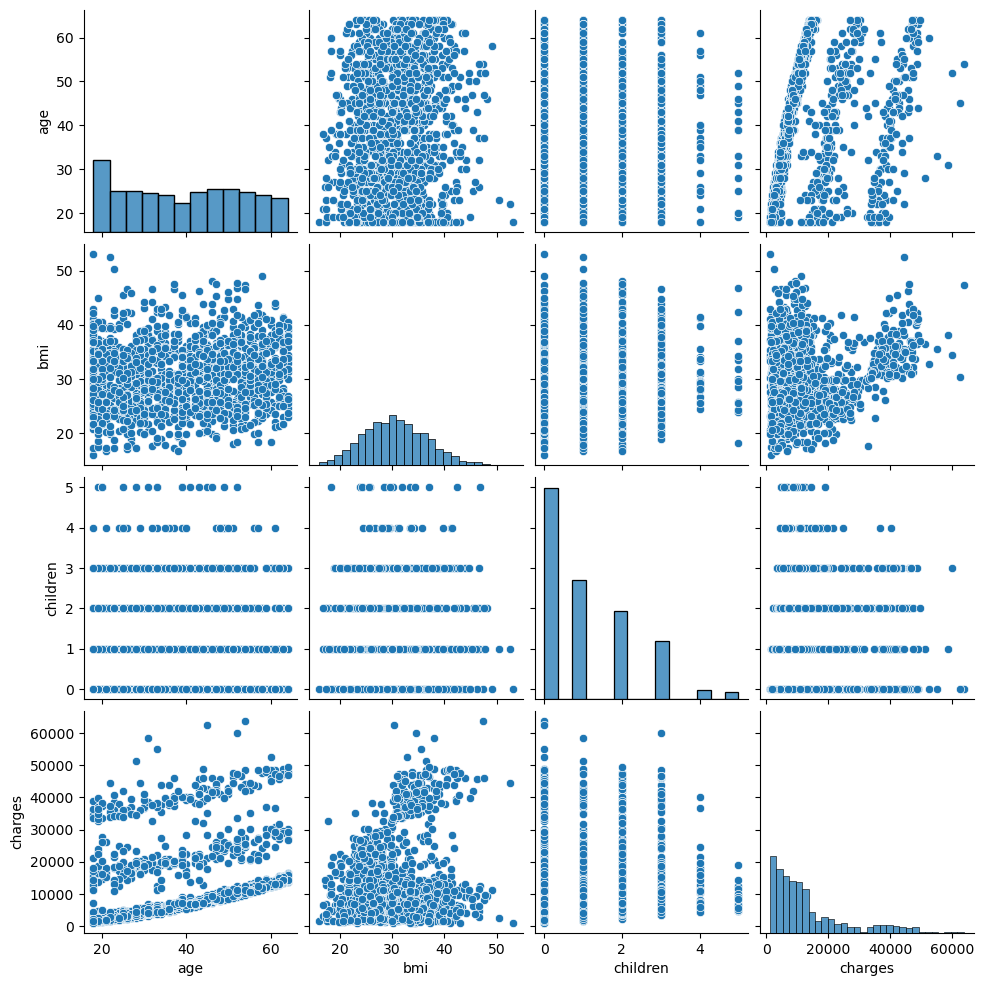

In [305]:
# Create pairplots to visually explore relationships between numerical features
sns.pairplot(df)  # Displays scatter plots for each pair of variables and histograms for individual features
plt.show()

### Distribution of charges (EDA)

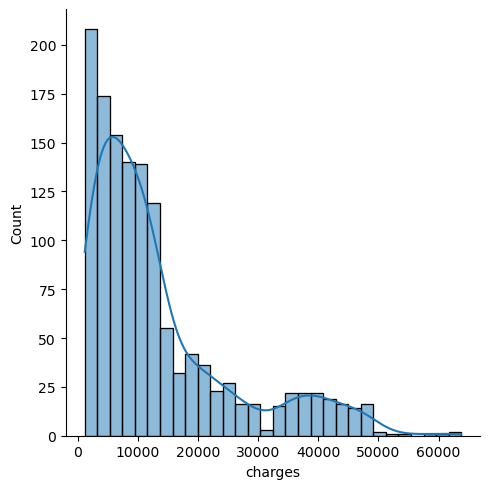

In [306]:
sns.displot(df['charges'], kde=True)

### Encode Categorical Variables (Data Preprocessing)

In [307]:
df2 = df.copy()

# Select categorical columns
cat_cols = df.select_dtypes('object').columns.tolist() 

# Initialize and fit the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(df2[cat_cols]) #(InsightsByRish, 2024)

# Transform categorical variables
encoded_cols = encoder.get_feature_names_out(cat_cols) #(InsightsByRish, 2024)
df2[encoded_cols] = encoder.transform(df2[cat_cols]) #(InsightsByRish, 2024)

# Drop original categorical columns
df2.drop(columns=cat_cols, inplace=True) #(InsightsByRish, 2024)

### Correlation heatmap (EDA)

Identifies features that are strongly linearly related to charges (target).

Helps guide feature selection decisions.

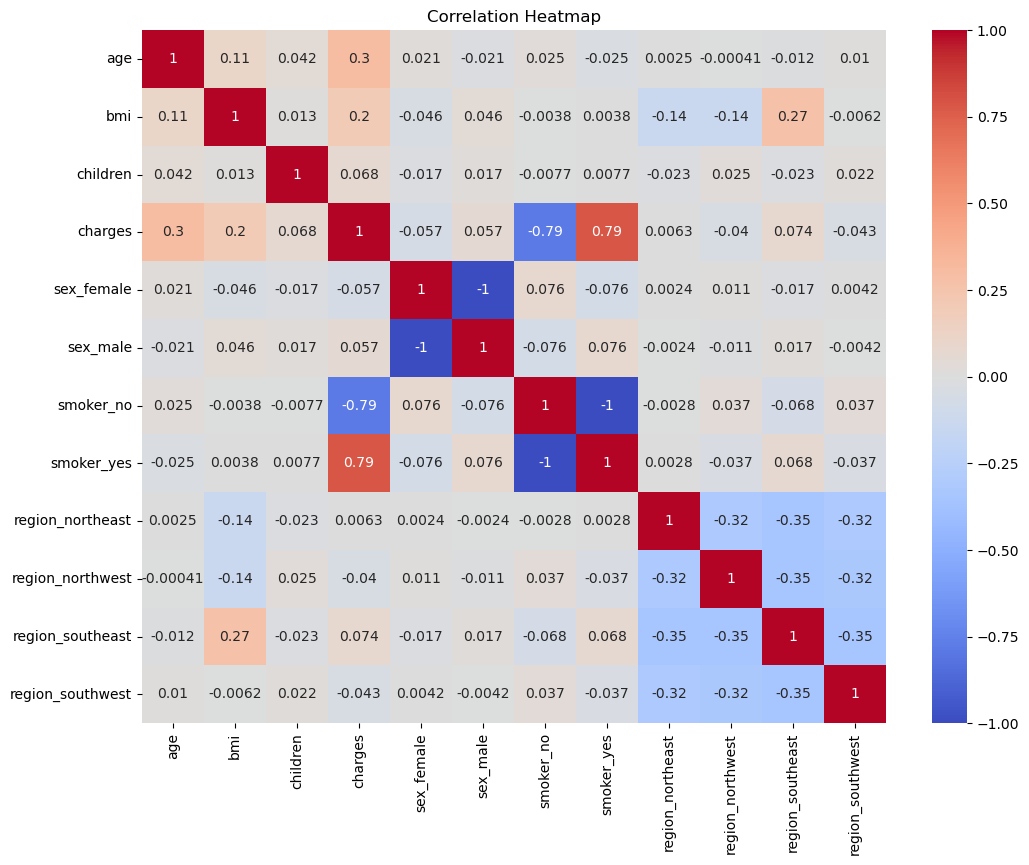

In [308]:
# Generate a correlation matrix to identify highly correlated variables
plt.figure(figsize=(12, 9))
sns.heatmap(df2.corr(), annot=True, cmap="coolwarm") # Display correlation coefficients; helps identify multicollinearity # (matplotlib.org, n,d.)
plt.title("Correlation Heatmap")
plt.show()


From the above correlation matrix we can see that those who smoke will pay more charges. We can also play somewhat of a role with the charges

#### Checking the distribution of charges for smokers vs non smokers (EDA)

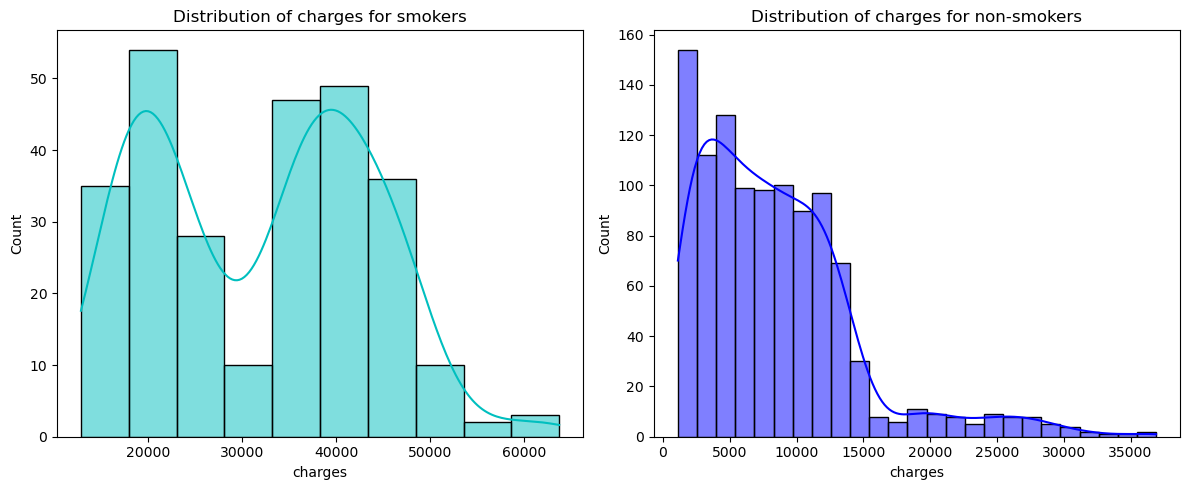

In [309]:
plt.figure(figsize=(12, 5))

# Plot for smokers
plt.subplot(1, 2, 1)
sns.histplot(df2[df2['smoker_yes'] == 1]['charges'], color='c', kde=True)
plt.title('Distribution of charges for smokers')

# Plot for non-smokers
plt.subplot(1, 2, 2)
sns.histplot(df2[df2['smoker_no'] == 1]['charges'], color='b', kde=True)
plt.title('Distribution of charges for non-smokers')

plt.tight_layout()
plt.show()

From this chart we can derive that those who smoke pay higher charges

#### BMI vs Charges (EDA)

C:\Users\lab_services_student\AppData\Local\Temp\ipykernel_7780\985105318.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["bmi"])


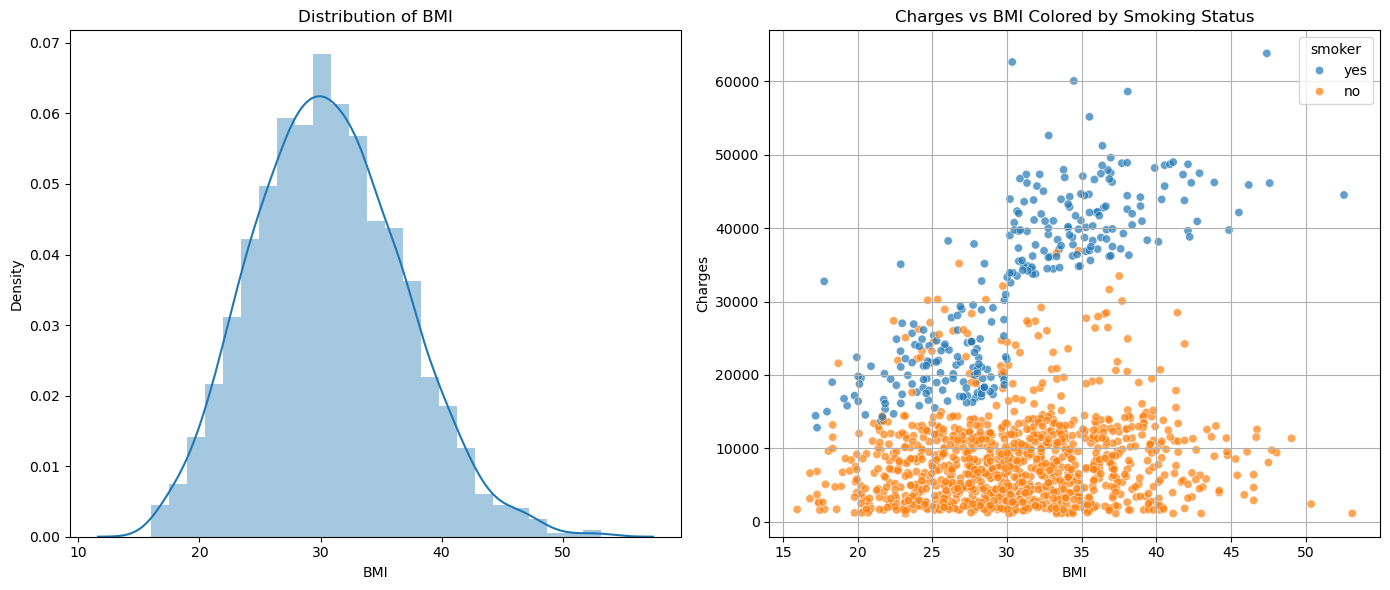

In [310]:
import matplotlib.pyplot as plt
import seaborn as sns

# First graph: Distribution of BMI
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.displot(df["bmi"])
plt.title("Distribution of BMI")
plt.xlabel("BMI")
plt.ylabel("Density")

# Second graph: Scatterplot of Charges vs BMI colored by Smoking Status
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker', alpha=0.7)
plt.title("Charges vs BMI Colored by Smoking Status")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.grid(True)

plt.tight_layout()
plt.show()


From this chart we can derive that those who have a BMI of above 30 and smoke will pay more charges

#### Charges distribution for Age Value and Smokers (EDA)

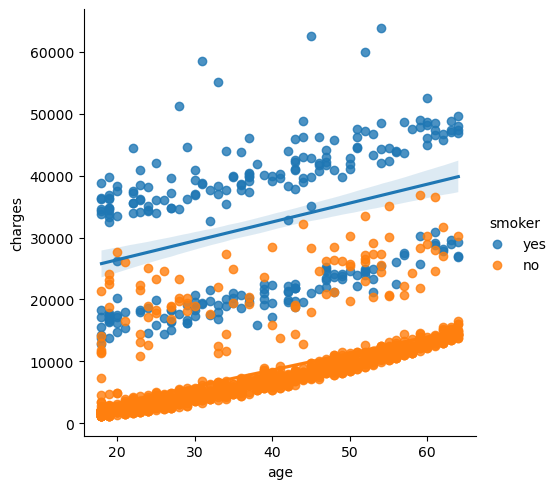

In [311]:
sns.lmplot(x="age", y="charges", hue="smoker", data=df)

From this graph we can see that as age increases, so does the cost of charges. We can also see that if you smoke you have a much higher chance to pay more charges. However there is still a gap between the smokers and the general shape of the plots are similar to non smokers(a curve), indicating that age doesn't really play a big factor in the charges of those who smoke.

### Define Features & Target 

#### Adding additional features

In [312]:
df2['bmi_smoker'] = df2.apply(lambda row: row['bmi'] if row['bmi'] > 30 and row['smoker_yes'] == 1 else 0, axis=1) #based on the graph created above we can see that if you smoke and have a high bmi and smoke your charges will be higher

### Exporting updated dataset to new CSV

In [313]:
df2.to_csv("Insurance New") #(Pdeuxa, 2020)

We export the cleaned and updated dataset into a new CSV for the event of using it in future newer models.

### Feature Selection for training.

In [314]:
# Separate the independent variables (features) from the dependent variable (target)
X = df2.drop(['charges'], axis=1) # Features: everything except 'charges' 
y = df2['charges'] # Target: the variable we are trying to predict

note that we don't drop both BMI and Smoker columns as it would reduce model performance, because you lose the base-level effect of smoking or BMI independently.

### Train-Test Split

Prevents overfitting and enables fair model evaluation.

In [315]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 80% for training, 20% for testing; random_state ensures reproducibility

### Normalising the data

In [316]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #(jonnybazookatone, 2017)
X_train = scaler.fit_transform(X_train)#(jonnybazookatone, 2017)
X_test = scaler.transform(X_test)#(jonnybazookatone, 2017)


We normalise the data as it can help model performance and accuracy. (Jaiswal, 2024)

### Train the Model

According to Geeksforgeeks.org (2025), Linear regression is a supervised machine learning algorithm which uses labelled datasets to learn and create the best-fitting linear function for mapping data points. This function can then be used to make predictions on new data.

In [317]:
# Initialize and train the Linear Regression model
model = LinearRegression() # Instantiate the model
model.fit(X_train, y_train) # Train the model using training data

LinearRegression()

### Make predictions

This step tests the model’s generalization to unseen data.

In [318]:
# Use the trained model to make predictions on the test set
y_pred = model.predict(X_test)  # Predicts charges based on X_test features

### Evaluating the model

These metrics give a comprehensive view of model accuracy and error spread.

We use the following:

- R² Score: as it will show how well the model explains the variance in the target variable (Geeksforgeeks, 2023). A score closer to 1 means that the model predicted well whereas a score closer to 0 means that it performed poorly.

- Mean Absolute Error (MAE): as this tells us how much the model's predictions are off on average (Geeksforgeeks, 2023). A smaller value would be considered as good but it is important to note that this value is compared to the scale of the target variable.

- Mean Squared Error (MSE): as it calculates the average of the squared differences between actual and predicted values (Geeksforgeeks, 2023). It gives higher weight to larger errors, which means it penalises bigger mistakes more severely than MAE. A lower MSE indicates better model performance, but like MAE, it must be interpreted in the context of the scale of the target variable.

- Root Mean Squared Error (RMSE): RMSE is the square root of the mean squared error. It provides the error in the same units as the target variable (Geeksforgeeks, 2023). A lower RMSE means better fit. It is more sensitive to outliers than MAE.



###

In [319]:
# R² Score
r2 = r2_score(y_test, y_pred)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# --- PRINT METRICS ---
print("Model Evaluation Results:")
print(f"R-squared (R²): {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Model Evaluation Results:
R-squared (R²): 0.91
Mean Absolute Error (MAE): 2266.68
Mean Squared Error (MSE): 14924092.23
Root Mean Squared Error (RMSE): 3863.17


The model evaluation results show strong performance, with an R² score of 0.91, indicating that approximately 91% of the variance in medical charges is explained by the model. The MAE of 2266.68 and RMSE of 3863.17 suggest that, on average, the model's predictions deviate from the actual values by a few thousand dollars, which is reasonable given the wide range of charges in the dataset. The relatively low MSE further confirms that the model maintains consistent error rates without being heavily influenced by large individual errors.

### Applying Ridge Regression with L2 Regularization

In [323]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Apply Ridge Regression with L2 regularization
ridge_model = Ridge(alpha=50, max_iter=100, tol=1.0)  #(codebasics, 2021)
ridge_model.fit(X_train, y_train)

# Evaluate with cross-validation

cv_scores = cross_val_score(ridge_model, X_test, y_test, cv=5, scoring='r2') #(scikit-learn, 2009) and (scikit-learn, n,d.)
print("Ridge Regression CV R² Scores:", cv_scores)
print("Average CV R² Score:", cv_scores.mean())
print(f"R² Score: {ridge_model.score(X_test,y_test):.2f}")


Ridge Regression CV R² Scores: [0.85146853 0.94372117 0.90985607 0.77880681 0.93780022]
Average CV R² Score: 0.8843305595819496
R² Score: 0.91


Here we can see that using a Ridge model didn't have an effect on the R² score.

#### Linear Coefficients

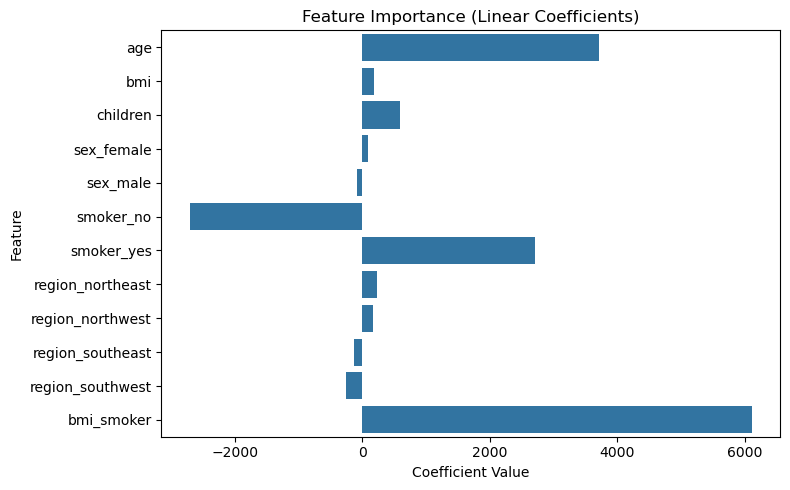

In [321]:
import seaborn as sns

# Coefficient importance plot
coefficients = pd.Series(model.coef_, index=X.columns)
plt.figure(figsize=(8, 5))
sns.barplot(x=coefficients.values, y=coefficients.index)
plt.title('Feature Importance (Linear Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


This plot helps us understand which features had the strongest influence on medical charges. Features with larger absolute values had more predictive power.

### Evaluation Metrics Summary

#### Comparison Between Standard Linear Regression and Ridge Regression

Both the standard Linear Regression model and the Ridge Regression model with L2 regularization performed similarly, though the standard Linear Regression achieved the same R² score. The average cross-validated R² score for Ridge was 0.884, indicating that it generalises well across multiple data splits.

This suggests that:
- The original Linear Regression model is already well-fitted and stable, benefiting from careful feature selection and low multicollinearity.
- The dataset is relatively clean and balanced, so additional regularization provides limited improvement.
- Our feature engineering, particularly the interaction between high BMI and smoker status, contributed significant predictive power, reducing the need for regularization to control for overfitting.

While Ridge Regression provided more consistent performance across folds (as shown by cross-validation), the standard Linear model slightly outperformed it on the full test set. Therefore, we can confidently say that the Linear Regression model is a strong and interpretable choice** for this task.


### Evaluation Visualisation

Here we use a Residual vs Predicted Plot Graph and a Actual vs Predicted Scatter Plot graph.

Residual vs Predicted: A residual vs. predictor plot is a scatterplot that displays the residuals (the differences between observed and predicted values) on the y-axis and the predictor (independent variable) on the x-axis (PennState: Statistics Online Courses, n,d.). We calculate residuals by taking the actual values and subtracting it from the predicted values.

Residuals = actual - predicted

We use this to check linearity. If the residuals show a random scatter around zero, it suggests a linear relationship is appropriate. Patterns like curves or trends indicate the model might be missing non-linear effects.

Actual vs Predicted: This graph shows how well the model was able to predict against the actual values. The closer they are to the red line, the more accurate they are.   



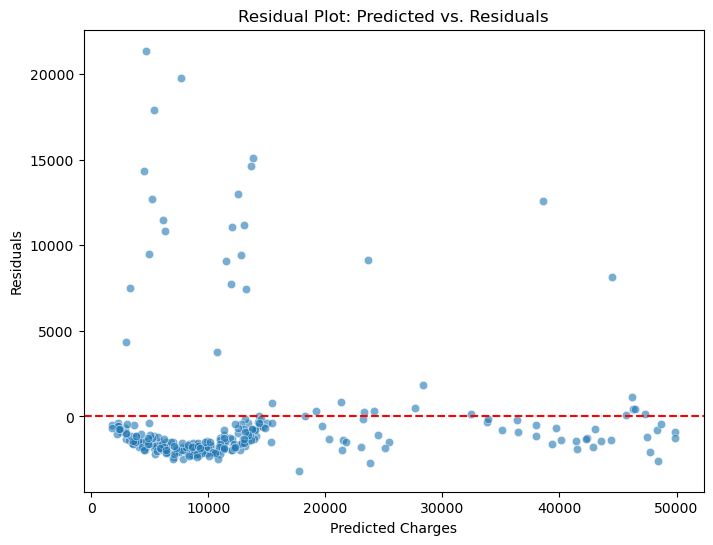

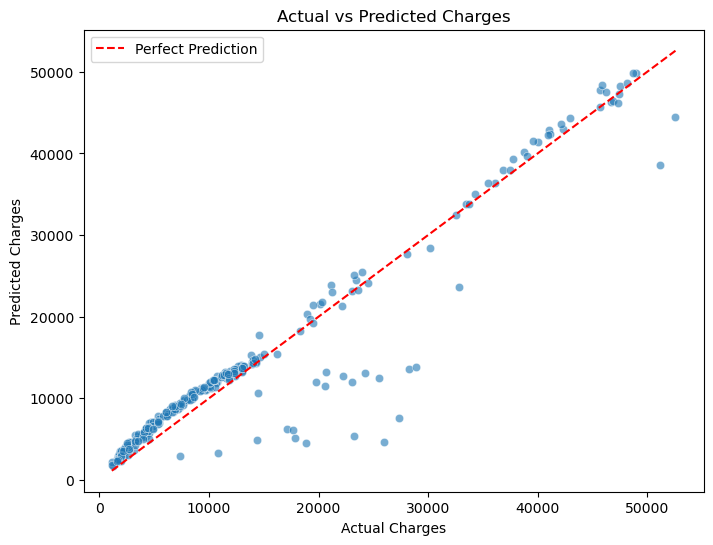

In [322]:
# VISUALIsATION: RESIDUAL PLOT

residuals = y_test - y_pred #(PennState: Statistics Online Courses, n,d.)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot: Predicted vs. Residuals')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.show()

# VISUALIsATION: ACTUAL VS PREDICTED
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label='Perfect Prediction') # (Léonard, 2020)
plt.title('Actual vs Predicted Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.legend()
plt.show()

#### Interpretation of the graphs 

Residual vs. Predicted Plot:

This plot displays the residuals (the difference between actual and predicted values) against the predicted charges. Ideally, residuals should be randomly scattered around the horizontal axis (zero line), indicating a good fit (PennState: Statistics Online Courses, n,d.). The plots are relatively close to the zero line except a few in the lower end of the graph. 

Actual vs. Predicted Plot:

This scatter plot compares the actual charges to the model's predicted charges, with the red dashed line representing perfect predictions. The model performs well overall as most of the points are close to the linear line.

### Conclusion

In this project, we developed and evaluated a Linear Regression model to predict medical aid charges based on lifestyle and demographic factors. Our exploratory data analysis revealed key insights — most notably, that smoking status and BMI significantly influence medical costs. An interaction term between BMI and smoking was also engineered to better capture the combined effect of these risk factors.

The standard Linear Regression model performed well, achieving an R² score of 0.91 and an RMSE of approximately 3863.17, indicating a strong ability to explain and predict medical charges. We further applied Ridge Regression (L2 regularization) with 5-fold cross-validation to assess whether regularization could improve performance. However, the results were very similar, suggesting that the dataset was already well-structured and the model did not suffer from high variance or multicollinearity.

Residual analysis showed that prediction errors were evenly distributed around zero, with no major patterns or variance changes. This confirms that the model meets the assumptions of linear regression — particularly linearity and homoscedasticity — making the results trustworthy.

In summary, the model generalises well and provides interpretable, data-driven insights for medical cost estimation. Future improvements could include testing non-linear models, incorporating additional medical or behavioral data, and applying advanced regularization or feature selection techniques to further enhance robustness. Nonetheless, the current model provides a strong foundation for cost prediction in a real-world medical aid context.


## Reference List



codebasics. (2021). Machine Learning Tutorial Python - 17: L1 and L2 Regularization | Lasso, Ridge Regression. [online] Available at: https://www.youtube.com/watch?v=VqKq78PVO9g [Accessed 15 May 2021].

Geeksforgeeks.org. (2025). ML | Linear Regression - GeeksforGeeks. [online] GeeksforGeeks. Available at: https://www.geeksforgeeks.org/ml-linear-regression/. [Accessed 21 April 2025].

Geeksforgeeks.org. (2021). ML | Python – seaborn.lmplot() method. [online] GeeksforGeeks. Available at: https://www.geeksforgeeks.org/python-seaborn-lmplot-method/  [Accessed 21 April 2025].

GeeksforGeeks. (2023). Regression Metrics. [online] Available at: https://www.geeksforgeeks.org/regression-metrics/. [Accessed 21 April 2025].

InsightsByRish (2024). House Price Prediction Project | Linear Regression | Machine Learning. [online] YouTube. Available at: https://www.youtube.com/watch?v=x_GZgeLJU4g [Accessed 21 April 2025].

Jaiswal, S. (2024). What is Normalization in Machine Learning? A Comprehensive Guide to Data Rescaling. [online] Datacamp.com. Available at: https://www.datacamp.com/tutorial/normalization-in-machine-learning. [Accessed 25 April 2025].

jonnybazookatone (2017). How can I increase the accuracy of my Linear Regression model?(machine learning with python). [online] Stack Overflow. Available at: https://stackoverflow.com/questions/47577168/how-can-i-increase-the-accuracy-of-my-linear-regression-modelmachine-learning. [Accessed 25 April 2025].

Léonard. (2020). How to show min and max values at the end of the axes. [online] Stack Overflow. Available at: https://stackoverflow.com/questions/64321561/how-to-show-min-and-max-values-at-the-end-of-the-axes. [Accessed 21 April 2025].

matplotlib.org. (n.d.). Choosing Colormaps in Matplotlib — Matplotlib 3.8.0 documentation. [online] Available at: https://matplotlib.org/stable/users/explain/colors/colormaps.html. [Accessed 22 April 2025].

Meesala, P., 2023. A Brief Overview of Simple Linear Regression and its Implementation in Python. [online] Medium. Available at: https://prasad07143.medium.com/a-brief-overview-of-simple-linear-regression-and-its-implementation-in-python-e6b5c180ff08 [Accessed 21 April 2025].


Pdeuxa (2020). Saving my dataset as a csv file in python. [online] Stack Overflow. Available at: https://stackoverflow.com/questions/62396245/saving-my-dataset-as-a-csv-file-in-python.

PennState: Statistics Online Courses. (n.d.). 4.3 - Residuals vs. Predictor Plot | STAT 501. [online] Available at: https://online.stat.psu.edu/stat501/lesson/4/4.3. [Accessed 21 April 2025].

scikit learn (2009). 3.1. Cross-validation: Evaluating Estimator Performance — scikit-learn 0.21.3 Documentation. [online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/cross_validation.html. [Accessed 25 April 2025].

scikit-learn. (n.d.). 3.3. Metrics and scoring: quantifying the quality of predictions. [online] Available at: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter. [Accessed 25 April 2025].

Tavishi, 2023. Linear Regression in ML. [online] Medium. Available at: https://medium.com/@tavishi.1402/linear-regression-in-ml-56107a59be03 [Accessed 21 April 2025].
‌